<a href="https://colab.research.google.com/github/Swastik02aug/almabetter-EDA-project/blob/main/Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [1]:
#importing all required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#mounting the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# initialising path for file
file_path_1='/content/drive/MyDrive/EDA PROJECT/Play Store Data.csv'
file_path_2='/content/drive/MyDrive/EDA PROJECT/User Reviews.csv'

In [4]:
#reading csv files
psd=pd.read_csv(file_path_1)
ur=pd.read_csv(file_path_2)

In [5]:
# here we get the data type of psd data frame
type(psd)

pandas.core.frame.DataFrame

In [6]:
# here we get the data type in in each columns
psd.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [7]:
# here we find no. of unique values in columns
psd.nunique()

App               9660
Category            34
Rating              40
Reviews           6002
Size               462
Installs            22
Type                 3
Price               93
Content Rating       6
Genres             120
Last Updated      1378
Current Ver       2832
Android Ver         33
dtype: int64

In [8]:
#  here we finding the null places in each column
psd.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [9]:
'''                                here we cleaning data by null value by some required specifics values                        '''

# on the basis of above data now we can clean the data

# as from data there are only one missing data in 'type ' so we replace the misssing place with  'free'.
psd['Type'].fillna("Free", inplace = True)

#in 'content rating' there is one  missing place, we can't replce with any other random value so its beneficial for us to drop that this row.
psd.dropna(subset = ['Content Rating'], inplace=True)

# there are some columns also which is not reqiured for data analysis so it is better to drop that columns.
psd.drop(['Last Updated'], axis=1, inplace=True)

# there are also null value in current and android version ,so we replace NaN value by string'not availavble' and '0'.
psd['Current Ver'] =psd['Current Ver'].replace({np.nan:'not available'})
psd['Android Ver'] =psd['Android Ver'].replace({np.nan:'not available'})
psd['Rating'] =psd['Rating'].replace({np.nan:0})


In [10]:
# again we check data for null values
psd.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Current Ver       0
Android Ver       0
dtype: int64

In [11]:
'''                         Now we covert the data types a/c to its requirement(Rating,	Reviews, 	Size,  Installs,  Price)    '''


# hence reviews contains int and floats ,we convert all in int.
psd['Reviews']=psd['Reviews'].astype(int)


In [12]:
#here we checking the size columns ,that what are types of values it contain a/c to that we remove or replace data and than converted to other data type
a=list(psd['Size'])
print(a)
# it conatains (M,Varies with device,  ','   ,  K,  +)

['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '19M', '29M', '33M', '3.1M', '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M', '31M', '14M', '12M', '4.2M', '7.0M', '23M', '6.0M', '25M', '6.1M', '4.6M', '4.2M', '9.2M', '5.2M', '11M', '11M', '4.2M', '9.2M', '24M', 'Varies with device', '11M', '9.4M', '15M', '10M', 'Varies with device', '1.2M', '12M', '24M', '26M', '8.0M', '7.9M', '25M', '56M', '57M', 'Varies with device', '35M', '33M', '33M', '5.6M', '54M', '201k', '3.6M', '5.7M', '17M', '8.6M', '2.4M', '27M', '2.7M', '2.5M', 'Varies with device', 'Varies with device', '7.0M', '35M', '16M', '16M', 'Varies with device', '17M', '3.4M', '8.9M', '3.9M', '2.9M', '38M', '32M', '37M', '15M', '5.4M', '18M', 'Varies with device', '38M', '1.1M', 'Varies with device', 'Varies with device', '7.9M', '35M', 'Varies with device', '17M', '19M', '14M', '2.2M', '4.5M', '17M', '14M', '9.8M', '21M', 'Varies with device', '52M', '14M', '25M', '9.0M', 'Varies with device', '12M', 'Varies with dev

In [13]:

#size contains various types of symbols,so we have to remove it ,after that we can change data type
psd['Size'] = psd.Size.apply(lambda x: x.strip('+'))

#  removing the `,`
psd['Size'] = psd.Size.apply(lambda x: x.replace(',', ''))

# converting the M to Mega
psd['Size'] = psd.Size.apply(lambda x: x.replace('M', 'e+6'))

# convertinf the K to Kilo
psd['Size'] = psd.Size.apply(lambda x: x.replace('k', 'e+3'))

# removing string by null values
psd['Size'] = psd.Size.replace('Varies with device', np.NaN)

# Converting the string to Numeric type
psd['Size'] = pd.to_numeric(psd['Size'])

# finally we drop the null value rows
psd.dropna(subset = ['Size'], inplace=True)

In [14]:
# here we checking install columns ,that  is contains some symbol(+ and ,)
a=list(psd['Installs'])
print(a)

['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+', '50,000+', '50,000+', '1,000,000+', '1,000,000+', '10,000+', '1,000,000+', '1,000,000+', '10,000,000+', '100,000+', '100,000+', '5,000+', '500,000+', '10,000+', '5,000,000+', '10,000,000+', '100,000+', '100,000+', '500,000+', '100,000+', '50,000+', '10,000+', '500,000+', '100,000+', '10,000+', '100,000+', '100,000+', '50,000+', '100,000+', '100,000+', '10,000+', '100,000+', '500,000+', '10,000+', '500,000+', '10,000+', '100,000+', '100,000+', '10,000+', '10,000,000+', '100,000+', '100,000+', '100,000+', '100,000+', '1,000,000+', '100,000+', '100,000+', '100,000+', '100,000+', '50,000+', '100,000+', '100,000+', '100,000+', '10,000+', '100,000+', '1,000,000+', '100,000+', '100,000+', '10,000+', '50,000+', '5,000,000+', '5,000,000+', '500,000+', '10,000,000+', '500,000+', '50,000+', '100,000+', '1,000,000+', '100,000+', '1,000,000+', '50,000+', '1,000,000+', '500,000+', '100,000+', '1,000,000+', '100,000+', '100,000+', '100,

In [15]:
#here we removing (+)
psd['Installs'] = psd.Installs.apply(lambda x: x.strip('+'))
#here we replacing (, by space)
psd['Installs'] =psd.Installs.apply(lambda x: x.replace(',', ''))
# here we convert the data type 
psd['Installs']=psd['Installs'].astype(int)

In [16]:
# here we checking  data of price columns,and it conatin($) symbols.
a=list(psd['Price'])
print(a)

['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '$4.99', '$4.99', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '

In [17]:
#here we remove '$' symbol from price
psd['Price'] = psd.Price.apply(lambda x: x.strip('$'))

# now here we convert the datatype of price
psd['Price']=psd['Price'].astype(float)

In [18]:
#now each columns are coverted into specified data types
psd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9145 entries, 0 to 10840
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9145 non-null   object 
 1   Category        9145 non-null   object 
 2   Rating          9145 non-null   float64
 3   Reviews         9145 non-null   int64  
 4   Size            9145 non-null   float64
 5   Installs        9145 non-null   int64  
 6   Type            9145 non-null   object 
 7   Price           9145 non-null   float64
 8   Content Rating  9145 non-null   object 
 9   Genres          9145 non-null   object 
 10  Current Ver     9145 non-null   object 
 11  Android Ver     9145 non-null   object 
dtypes: float64(3), int64(2), object(7)
memory usage: 928.8+ KB


In [19]:
# '.describe()' is used to give all those columns whoes contain only int and float values.
psd.describe()

,Rating,Reviews,Size,Installs,Price
count,9145.000000,9.145000e+03,9.145000e+03,9.145000e+03,9145.000000
mean,3.527578,2.490487e+05,2.151653e+07,7.114842e+06,1.184366
std,1.590804,1.716211e+06,2.258875e+07,4.619357e+07,17.355754
min,0.000000,0.000000e+00,8.500000e+03,0.000000e+00,0.000000
25%,3.600000,2.200000e+01,4.900000e+06,1.000000e+03,0.000000
50%,4.200000,7.420000e+02,1.300000e+07,1.000000e+05,0.000000
75%,4.500000,2.503700e+04,3.000000e+07,1.000000e+06,0.000000
max,5.000000,4.489389e+07,1.000000e+08,1.000000e+09,400.000000


In [20]:
#by using function '.head()' we display the first five rows with all columns
psd.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0.0,Everyone,Art & Design,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,Teen,Art & Design,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0.0,Everyone,Art & Design;Creativity,1.1,4.4 and up


In [21]:
#by using function '.tail()' we display the last five rows with all columns
psd.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver
10835,FR Forms,BUSINESS,0.0,0,9600000.0,10,Free,0.0,Everyone,Business,1.1.5,4.0 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000000.0,5000,Free,0.0,Everyone,Education,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600000.0,100,Free,0.0,Everyone,Education,1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,0.0,3,9500000.0,1000,Free,0.0,Everyone,Medical,1.0,2.2 and up
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19000000.0,10000000,Free,0.0,Everyone,Lifestyle,Varies with device,Varies with device


In [22]:
# '.columns' is use to give all name in a list
psd.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver'],
      dtype='object')

In [23]:
#'.shape' is used to give information about numbers of rows and columns as (rows,columns)
psd.shape

(9145, 12)

  QUESTION:Find the numbers of apps in each category of content rating ?

---



In [54]:
#psd['Category'].value_counts()
x2 = psd['Content Rating'].value_counts().index
y2 = psd['Content Rating'].value_counts()
print(y2)

Everyone           7416
Teen                987
Mature 17+          406
Everyone 10+        332
Adults only 18+       2
Unrated               2
Name: Content Rating, dtype: int64


In [38]:
# here we store cotent rating categories in l1 and their count values in l2 list.
l1 = []
l2 = []
for i in range(len(x2)):
    l1.append(x2[i])
    l2.append(y2[i])

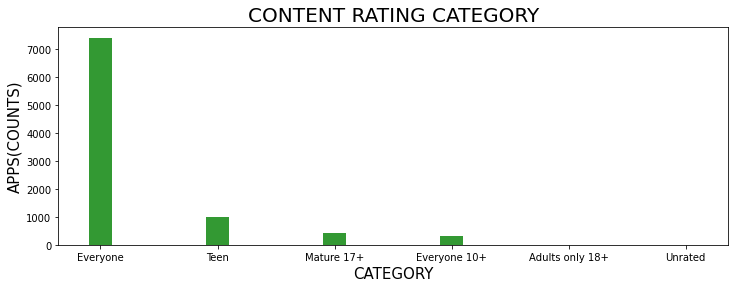

In [41]:
#plot
plt.figure(figsize=(12,4))
plt.bar(l1,l2,width=0.2,color='green', alpha=0.8);
plt.title('CONTENT RATING CATEGORY',size = 20);
plt.ylabel('APPS(COUNTS)',size=15);
plt.xlabel('CATEGORY',size=15); 

QUESTION:Find the numbers of apps in each category ?

In [53]:
x=psd['Category'].value_counts().index
y=psd['Category'].value_counts()
print(y)

FAMILY                 1832
GAME                   1015
TOOLS                   739
MEDICAL                 434
BUSINESS                400
PERSONALIZATION         355
LIFESTYLE               345
SPORTS                  311
FINANCE                 307
PRODUCTIVITY            303
COMMUNICATION           265
HEALTH_AND_FITNESS      264
PHOTOGRAPHY             254
NEWS_AND_MAGAZINES      216
DATING                  212
SOCIAL                  210
SHOPPING                201
BOOKS_AND_REFERENCE     197
TRAVEL_AND_LOCAL        192
VIDEO_PLAYERS           131
EDUCATION               111
MAPS_AND_NAVIGATION     108
FOOD_AND_DRINK          100
ENTERTAINMENT            90
LIBRARIES_AND_DEMO       82
AUTO_AND_VEHICLES        75
HOUSE_AND_HOME           68
ART_AND_DESIGN           62
EVENTS                   57
WEATHER                  57
PARENTING                54
COMICS                   51
BEAUTY                   47
Name: Category, dtype: int64


In [56]:
l1=[]
l2=[]
for i in range(len(x)):
    l1.append(x[i])
    l2.append(y[i])
# here l1 store index value and l2 store count values in each category    

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


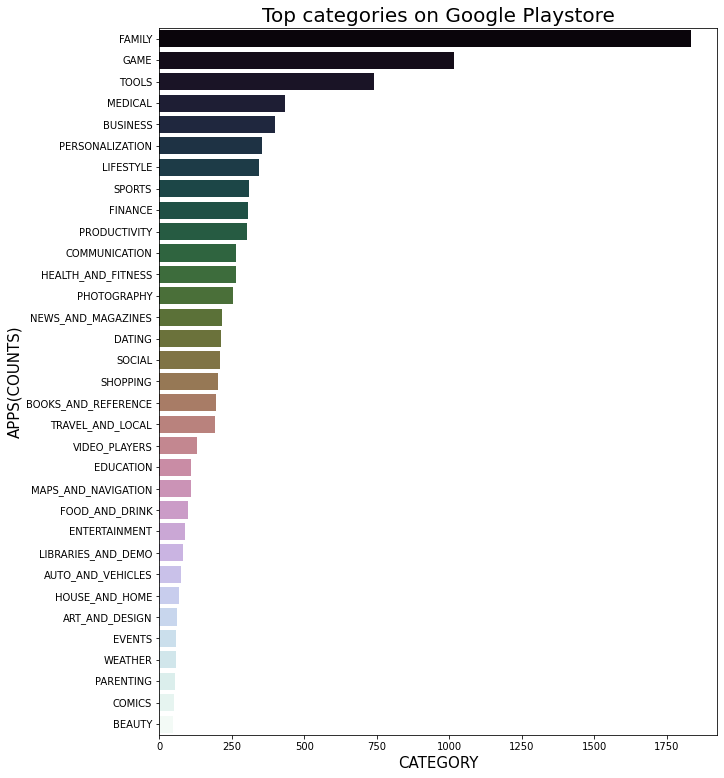

In [69]:
plt.figure(figsize=(10,13))
plt.ylabel('APPS(COUNTS)',size=15);
plt.xlabel('CATEGORY',size=15); 
graph = sns.barplot(l2, l1,alpha=1, palette= "cubehelix")
graph.set_title("Top categories on Google Playstore", fontsize = 20); 

QUESTION:Find the number of apps lies in free and paid category?

In [76]:
x=psd['Type'].value_counts(sort = True).index
y=psd['Type'].value_counts(sort = True)
print(y)

Free    8421
Paid     724
Name: Type, dtype: int64


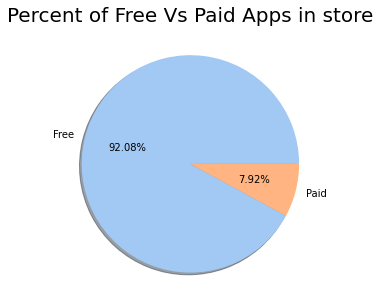

In [90]:
#from the series we find that there are 8421 free apps and rest are paids
plt.figure(figsize=(10,5))
labels = x
colors = sns.color_palette('pastel')[0:7]
plt.pie(y, labels = labels, colors = colors, autopct='%.2f%%', shadow=True, startangle=0)
plt.title('Percent of Free Vs Paid Apps in store',size = 20)
plt.show()



QUESTION:Find the over all distributrions rating?

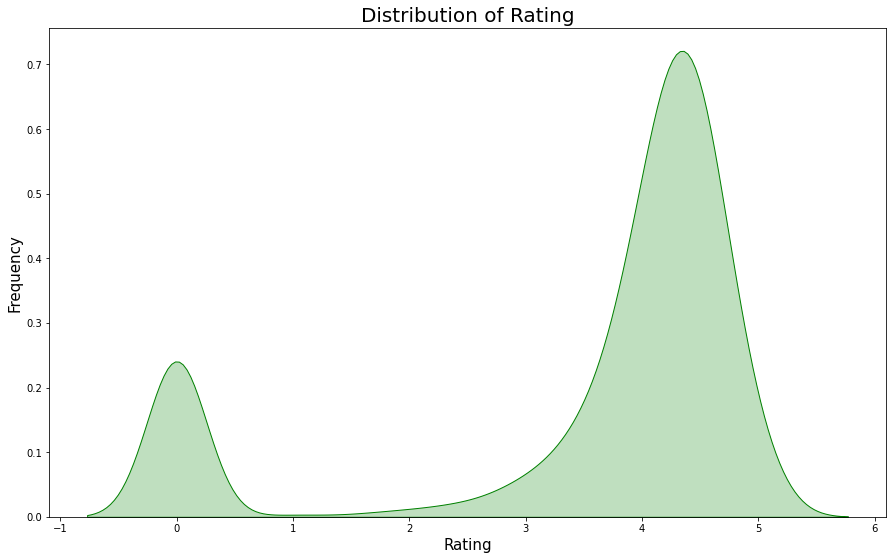

In [67]:
#code
plt.figure(figsize=(15,9))
plt.xlabel("Rating",size = 15)
plt.ylabel("Frequency",size = 15)
graph = sns.kdeplot(psd.Rating, color="green", shade = True)
plt.title('Distribution of Rating',size = 20);

QUESTION:Find the numbers of apps install in each category?

<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>


TypeError: ignored

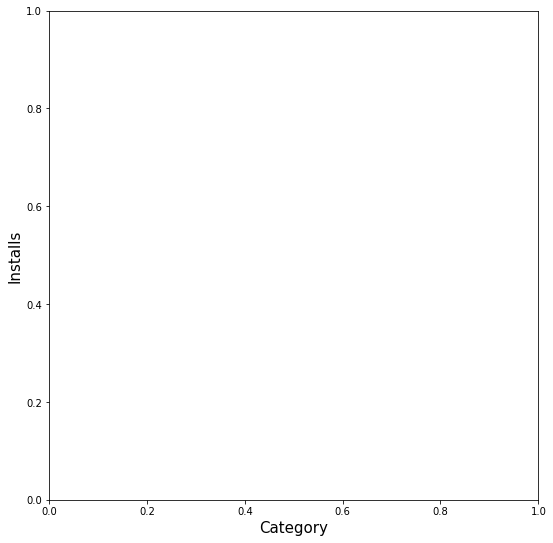

In [95]:
plt.figure(figsize=(15,9))
x=plt.xlabel("Category",size = 15)
y=plt.ylabel("Installs",size = 15)
colors = sns.color_palette('pastel')[0:7]
plt.pie(y, labels = x, colors = colors)
plt.title('Percent of Free Vs Paid Apps in store',size = 20)
plt.show()

In [81]:
psd.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0.0,Everyone,Art & Design,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,Teen,Art & Design,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0.0,Everyone,Art & Design;Creativity,1.1,4.4 and up


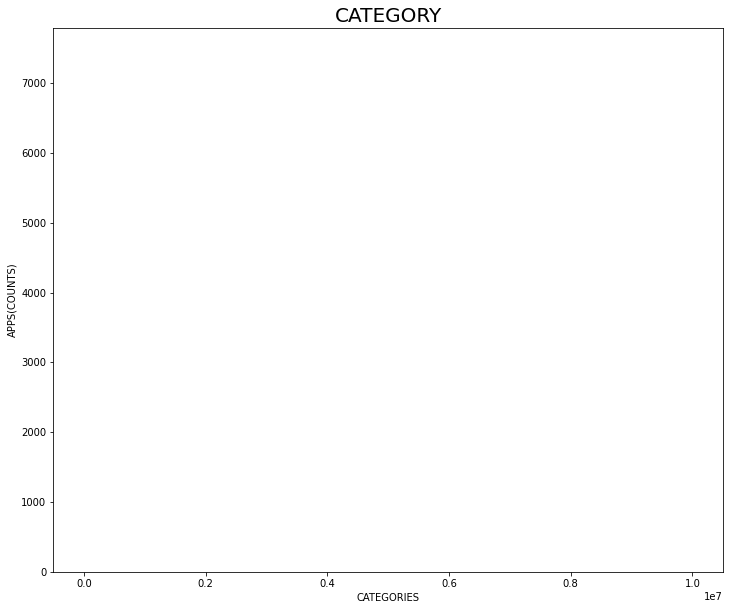

In [94]:
#code
psd['Installs'].value_counts()
x2 = psd['Installs'].value_counts().index
y2 = psd['Content Rating'].value_counts()

x2sis = []
y2sis = []
for i in range(len(y2)):
    x2sis.append(x2[i])
    y2sis.append(y2[i])

#plot
plt.figure(figsize=(12,10))
plt.bar(x2sis,y2sis,width=0.8,color='blue', alpha=0.8);
plt.title('CATEGORY',size = 20);
plt.ylabel('APPS(COUNTS)');
plt.xlabel('CATEGORIES');

In [ ]:
x = np.linspace(0, 2 * np.pi, 100)
y = np.sin(x)
y2 = y + 0.2 * np.random.normal(size = x.shape)
   
fig, ax = plt.subplots()
ax.plot(x, y)
ax.plot(x, y2)
  
ax.set_xticks([0, np.pi, 2 * np.pi])
ax.set_xticklabels(['0', r'$\pi$', r'2$\pi$'])
   
ax.spines['left'].set_bounds(-1, 1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
   
fig.suptitle('matplotlib.axes.Axes.set_xticklabels() \
function Example\n\n', fontweight ="bold")
fig.canvas.draw()
plt.show()

QUESTION.6:Print top 5 in any categories with bars?

enter the category:Sports


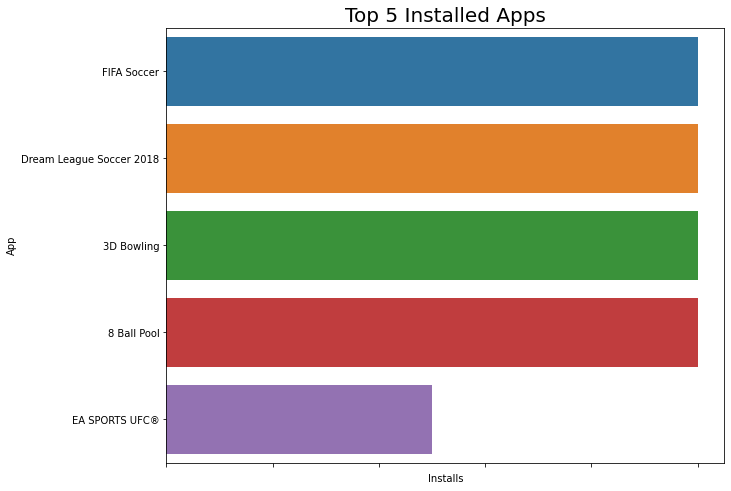

In [110]:
#code
i =input('enter the category:')
i=i.upper()
top5 = psd[psd['Category'] == i]
top5apps = top5.sort_values(by='Installs', ascending=False).head(5)
# Top_Apps_in_art_and_design
plt.figure(figsize=(10,8))
plt.title('Top 5 Installed Apps',size = 20);    
graph = sns.barplot(x =top5apps.Installs , y = top5apps.App)
graph.set_xticklabels(graph.get_xticklabels(), rotation= 45, horizontalalignment='right',size=15);

Question.Which category App's have most number of installs?

In [95]:
most_install= psd.groupby('Category')[['Installs']].sum().sort_values(by='Installs', ascending=False)
most_install.head()

,Installs
Category,
GAME,29874564253
FAMILY,6798793425
COMMUNICATION,4941943051
NEWS_AND_MAGAZINES,4252005650
TOOLS,3527094815


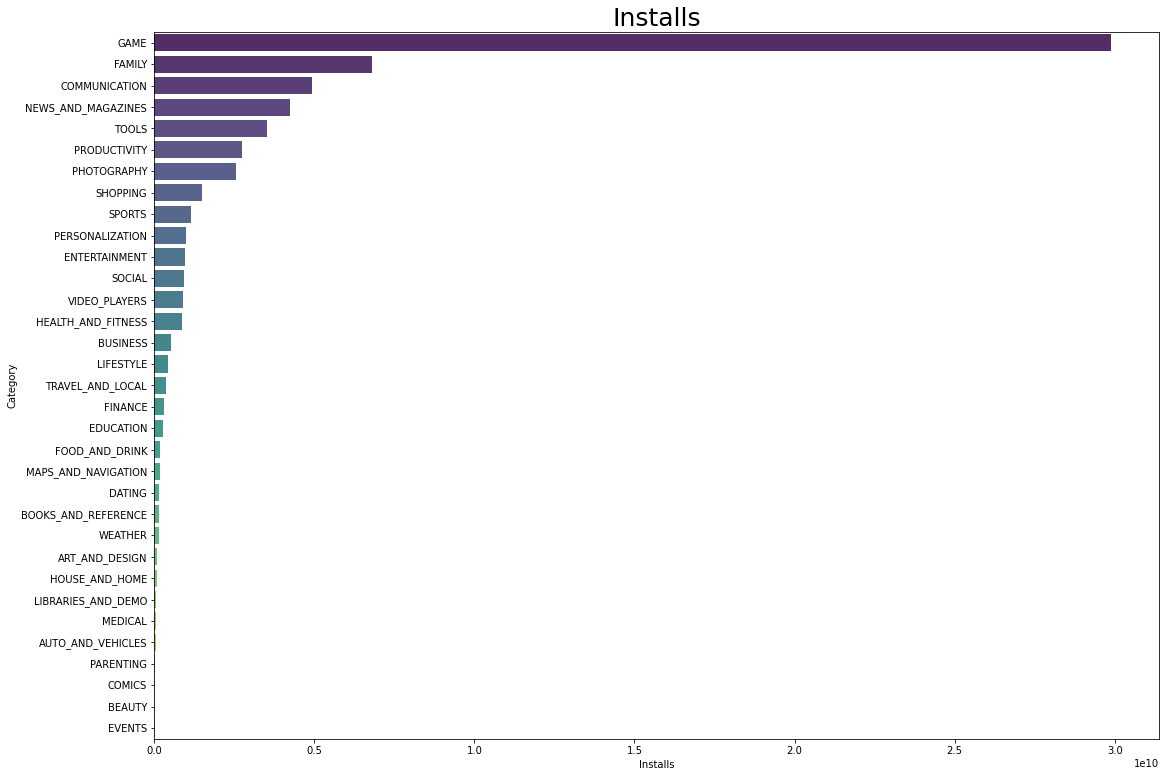

In [97]:
x2sis = []
y2sis = []

for i in range(len(most_install)):
    x2sis.append(most_install.Installs[i])
    y2sis.append(most_install.index[i])

plt.figure(figsize=(18,13))

plt.xlabel("Installs")
plt.ylabel("Category")
graph = sns.barplot(x = x2sis, y = y2sis, alpha =0.9, palette= "viridis")
graph.set_title("Installs", fontsize = 25);

In [ ]:
# user revives top 5 rows
ur.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [ ]:
# user revives data frame size
ur.shape

(64295, 5)

QUESTION.7:Find the top all app with sentiment polarity 1 ?

In [ ]:
top5Apps = ur[ur['Sentiment_Polarity'] == 1.00].sort_values( ascending=False).head(11)

Question:Which are the top 10 expensive Apps in playstore?

In [111]:
top10PaidApps = psd[psd['Type'] == 'Paid'].sort_values(by='Price', ascending=False).head(11)
# top10PaidApps

In [112]:
top10PaidApps_df = top10PaidApps[['App', 'Installs']].drop(9934)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128142 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128142 missing from current font.
  font.set_text(s, 0, flags=flags)


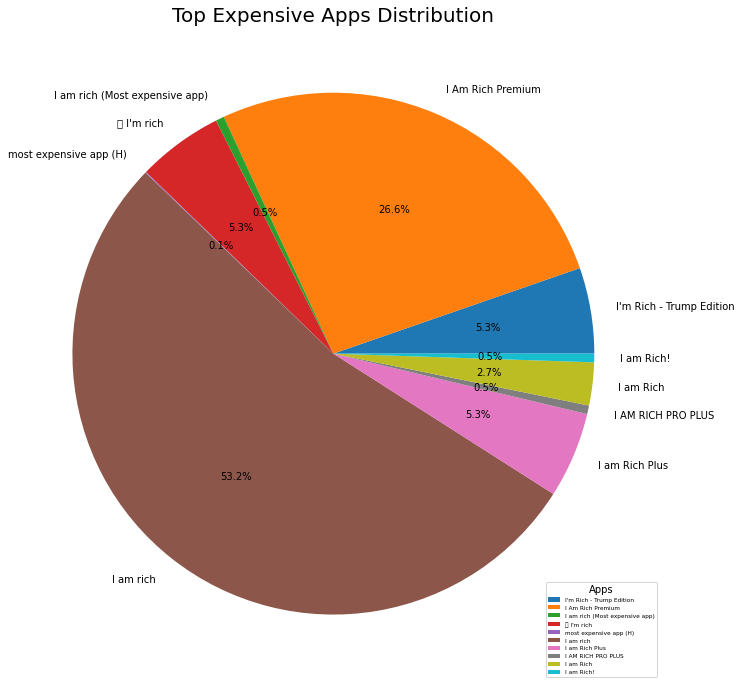

In [113]:
plt.figure(figsize=(15,12));
plt.pie(top10PaidApps_df.Installs, explode=None, labels=top10PaidApps_df.App, autopct='%1.1f%%', startangle=0);
plt.title('Top Expensive Apps Distribution',size = 20);
plt.legend(top10PaidApps_df.App, 
           loc="lower right",
           title="Apps",
           fontsize = "xx-small"
          );

In [ ]:
#code

Questions:Which are the Apps with highest number of reviews?


In [115]:
Apps_with_Highest_rev = psd.sort_values(by='Reviews', ascending=False).head(20)
Apps_with_Highest_rev

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver
1879,Clash of Clans,GAME,4.6,44893888,98000000.0,100000000,Free,0.0,Everyone 10+,Strategy,10.322.16,4.1 and up
1704,Clash of Clans,GAME,4.6,44891723,98000000.0,100000000,Free,0.0,Everyone 10+,Strategy,10.322.16,4.1 and up
1670,Clash of Clans,GAME,4.6,44891723,98000000.0,100000000,Free,0.0,Everyone 10+,Strategy,10.322.16,4.1 and up
3986,Clash of Clans,FAMILY,4.6,44881447,98000000.0,100000000,Free,0.0,Everyone 10+,Strategy,10.322.16,4.1 and up
1872,Subway Surfers,GAME,4.5,27725352,76000000.0,1000000000,Free,0.0,Everyone 10+,Arcade,1.90.0,4.1 and up
1917,Subway Surfers,GAME,4.5,27725352,76000000.0,1000000000,Free,0.0,Everyone 10+,Arcade,1.90.0,4.1 and up
1750,Subway Surfers,GAME,4.5,27724094,76000000.0,1000000000,Free,0.0,Everyone 10+,Arcade,1.90.0,4.1 and up
1700,Subway Surfers,GAME,4.5,27723193,76000000.0,1000000000,Free,0.0,Everyone 10+,Arcade,1.90.0,4.1 and up
1654,Subway Surfers,GAME,4.5,27722264,76000000.0,1000000000,Free,0.0,Everyone 10+,Arcade,1.90.0,4.1 and up
3896,Subway Surfers,GAME,4.5,27711703,76000000.0,1000000000,Free,0.0,Everyone 10+,Arcade,1.90.0,4.1 and up


Question:What are the count of Apps in different genres?

In [116]:
topAppsinGenres = psd['Genres'].value_counts().head(50)


In [117]:
x3sis = []
y3sis = []

for i in range(len(topAppsinGenres)):
    x3sis.append(topAppsinGenres.index[i])
    y3sis.append(topAppsinGenres[i])

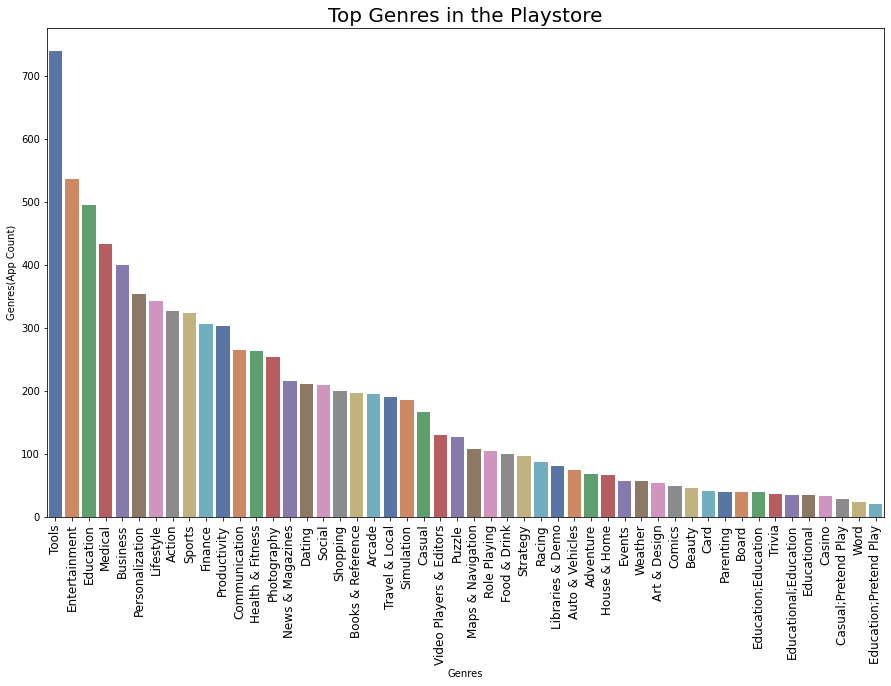

In [118]:
plt.figure(figsize=(15,9))
plt.ylabel('Genres(App Count)')
plt.xlabel('Genres')
graph = sns.barplot(x=x3sis,y=y3sis,palette="deep")
graph.set_xticklabels(graph.get_xticklabels(), rotation=90, fontsize=12)
graph.set_title("Top Genres in the Playstore", fontsize = 20);

Questions:Which are the apps that have made the highest earning?


In [119]:
Paid_Apps_df = psd[psd['Type'] == 'Paid']
earning_df = Paid_Apps_df[['App', 'Installs', 'Price']]
earning_df['Earnings'] = earning_df['Installs'] * earning_df['Price'];
earning_df_sorted_by_Earnings = earning_df.sort_values(by='Earnings', ascending=False).head(50)
earning_df_sorted_by_Price = earning_df_sorted_by_Earnings.sort_values(by='Price', ascending=False)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128142 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128142 missing from current font.
  font.set_text(s, 0, flags=flags)


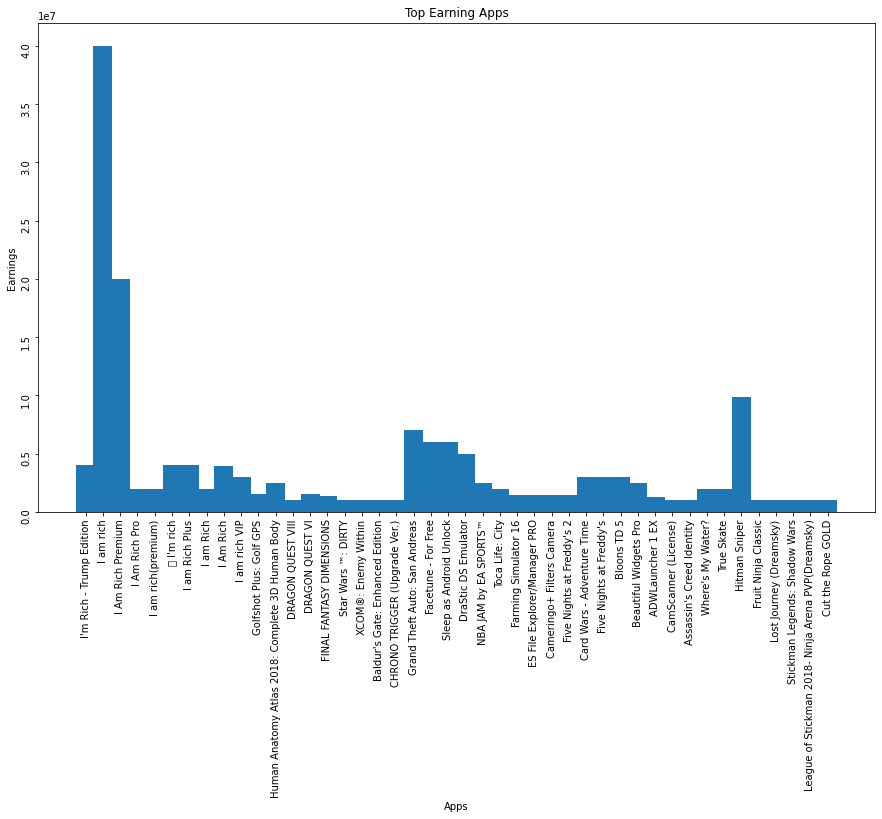

In [120]:
# PLot a bar chart of earning at y and app names at x
plt.figure(figsize=(15,9))
plt.bar(earning_df_sorted_by_Price.App, earning_df_sorted_by_Price.Earnings, width=1.1, label=earning_df_sorted_by_Price.Earnings)
plt.xlabel("Apps")
plt.ylabel("Earnings")
plt.tick_params(rotation=90)
plt.title("Top Earning Apps");